In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [177]:
churn = pd.read_csv("C:\\Users\\TAM NHU\\Downloads\\MIS395_TelcoCustomerChurn.csv")

In [178]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,NaN,70.70,151.65,Yes


In [179]:
churn.shape

(7043, 21)

In [180]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [181]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [182]:
churn.isna().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        5
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        5
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [183]:
#Điền bằng 'No phone service'. Điều này hợp lý nếu khách hàng không sử dụng dịch vụ điện thoại.
churn['MultipleLines'] = churn['MultipleLines'].fillna('No phone service')

#Điền vào mode (giá trị phổ biến nhất) trong cột này. Việc này giúp đảm bảo rằng những giá trị thiếu được thay thế bằng phương thức thanh toán mà khách hàng thường sử dụng nhất.
churn['PaymentMethod'] = churn['PaymentMethod'].fillna(churn['PaymentMethod'].mode()[0])

#Điền giá trị thiếu bằng median (trung vị) của cột này. Lý do chọn median là vì giá trị của TotalCharges có thể không phân phối đều, và median sẽ giúp giảm ảnh hưởng của các ngoại lệ (outliers).
churn['TotalCharges'] = churn['TotalCharges'].fillna(churn['TotalCharges'].median())


In [184]:
churn.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [185]:
# Loại bỏ dấu cách thừa ở đầu và cuối các giá trị trong 'Churn'
churn['Churn'] = churn['Churn'].str.strip()

# Kiểm tra lại các giá trị duy nhất trong cột 'Churn'
print(churn['Churn'].unique())

# Điền NaN bằng 'No'
churn['Churn'] = churn['Churn'].fillna('No')

# Áp dụng Label Encoding
churn['Churn'] = churn['Churn'].map({'Yes': 1, 'No': 0})

# Kiểm tra lại kết quả
print(churn['Churn'].head())

['No' 'Yes']
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [186]:
churn = pd.get_dummies(churn, columns=['InternetService', 'PaymentMethod', 'Contract'], drop_first=True)


In [187]:
churn.dtypes

customerID                                object
gender                                    object
SeniorCitizen                              int64
Partner                                   object
Dependents                                object
tenure                                     int64
PhoneService                              object
MultipleLines                             object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
PaymentMethod_Credit

In [188]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,29.85,29.85,0,False,False,False,True,False,False,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,56.95,1889.50,0,False,False,False,False,True,True,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,53.85,108.15,1,False,False,False,False,True,False,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,42.30,1840.75,0,False,False,False,False,False,True,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,70.70,151.65,1,True,False,False,True,False,False,False


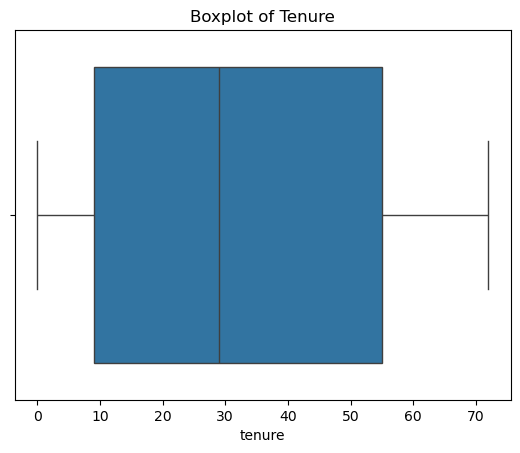

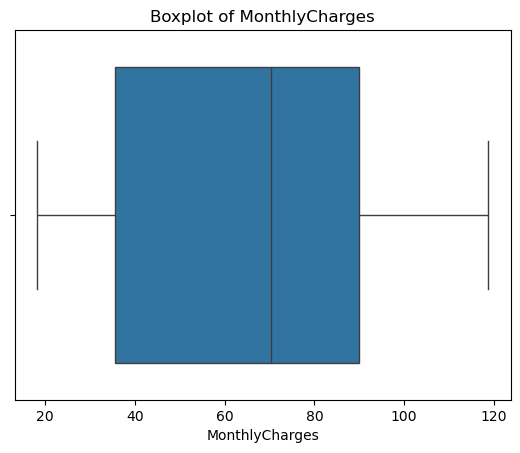

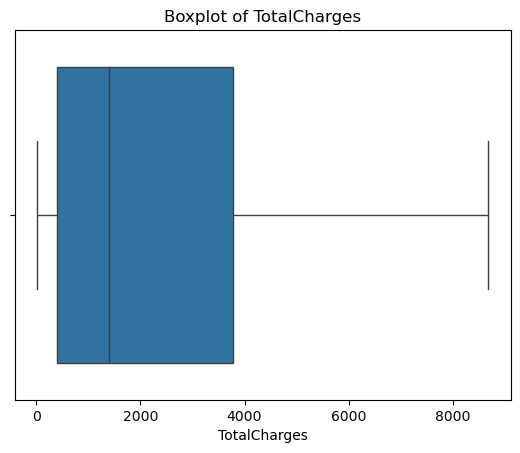

In [189]:
sns.boxplot(x=churn['tenure'])
plt.title('Boxplot of Tenure')
plt.show()

sns.boxplot(x=churn['MonthlyCharges'])
plt.title('Boxplot of MonthlyCharges')
plt.show()

sns.boxplot(x=churn['TotalCharges'])
plt.title('Boxplot of TotalCharges')
plt.show()

In [190]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [191]:
#Tạo biến 'charges_per_tenure' (Số tiền mỗi tháng trên thời gian thuê)
churn['charges_per_tenure'] = churn['MonthlyCharges'] / churn['tenure']

# Tạo biến 'is_high_charges' (Biến phân loại nếu MonthlyCharges cao hơn mức trung bình)
average_charges = churn['MonthlyCharges'].mean()
churn['is_high_charges'] = (churn['MonthlyCharges'] > average_charges).astype(int)

# Tạo biến 'is_contract_monthly' (Biến nhị phân nếu hợp đồng là theo tháng)
churn['is_contract_monthly'] = (~churn['Contract_One year'] & ~churn['Contract_Two year']).astype(int)


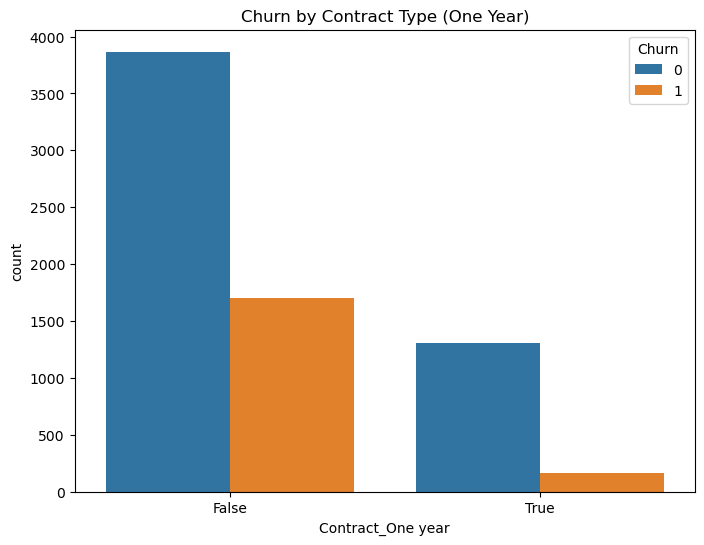

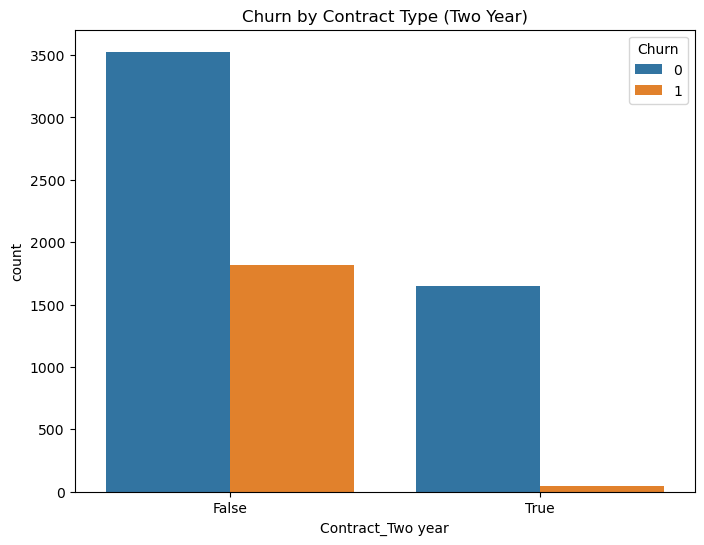

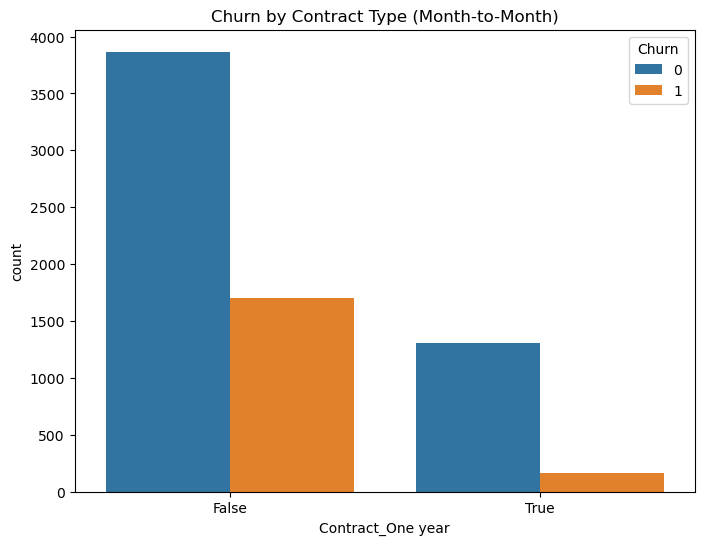

In [192]:
plt.figure(figsize=(8,6))
sns.countplot(x='Contract_One year', hue='Churn', data=churn)
plt.title('Churn by Contract Type (One Year)')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='Contract_Two year', hue='Churn', data=churn)
plt.title('Churn by Contract Type (Two Year)')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='Contract_One year', hue='Churn', data=churn)
plt.title('Churn by Contract Type (Month-to-Month)')
plt.show()

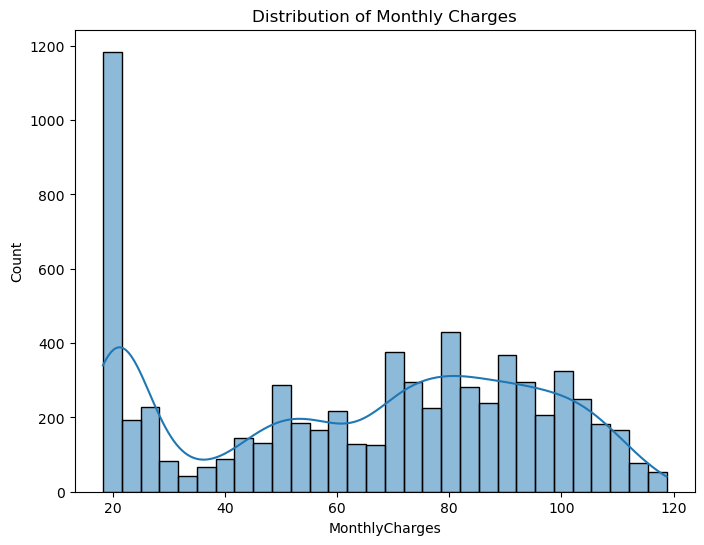

In [193]:
#Distribution of Monthly Charges (Phân bố của Monthly Charges)
plt.figure(figsize=(8,6))
sns.histplot(churn['MonthlyCharges'], kde=True, bins=30)
plt.title('Distribution of Monthly Charges')
plt.show()

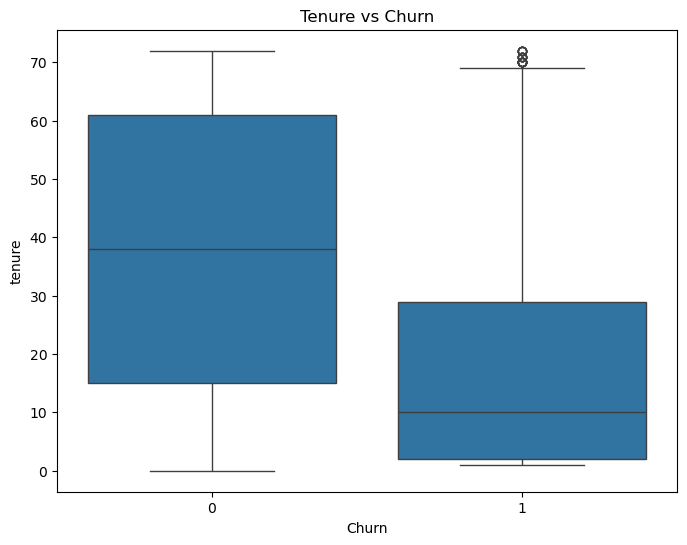

In [194]:
#Tenure vs Churn (Thời gian thuê so với churn)
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='tenure', data=churn)
plt.title('Tenure vs Churn')
plt.show()

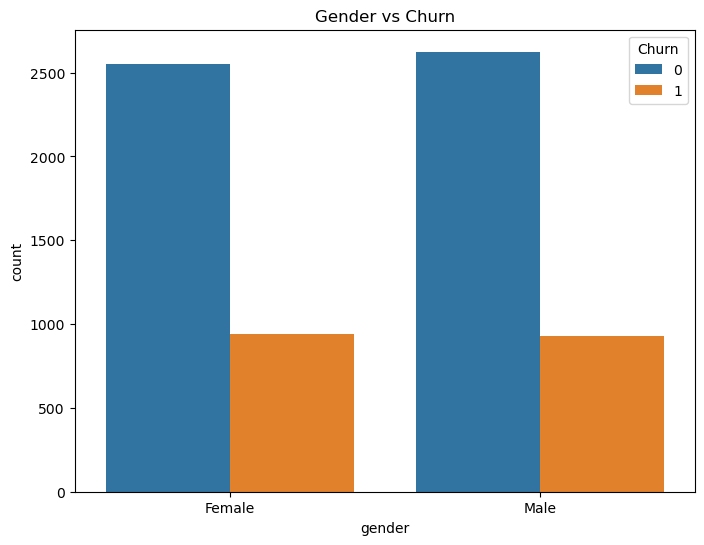

In [195]:
#4. Gender vs Churn (Giới tính so với churn)
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='Churn', data=churn)
plt.title('Gender vs Churn')
plt.show()

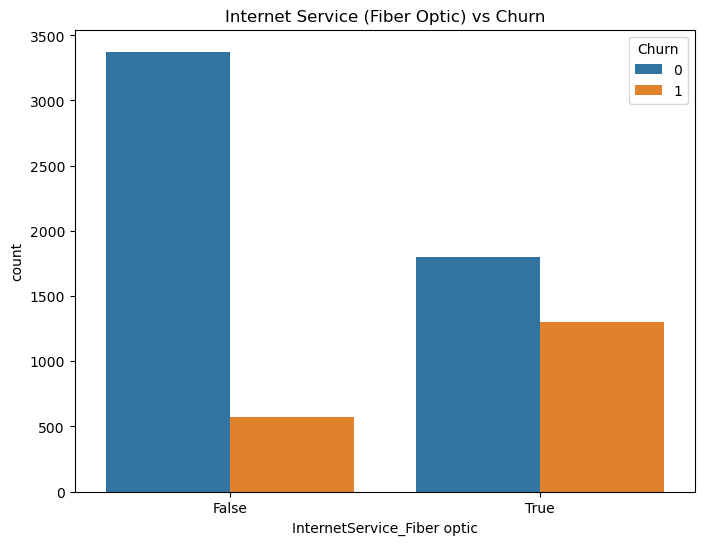

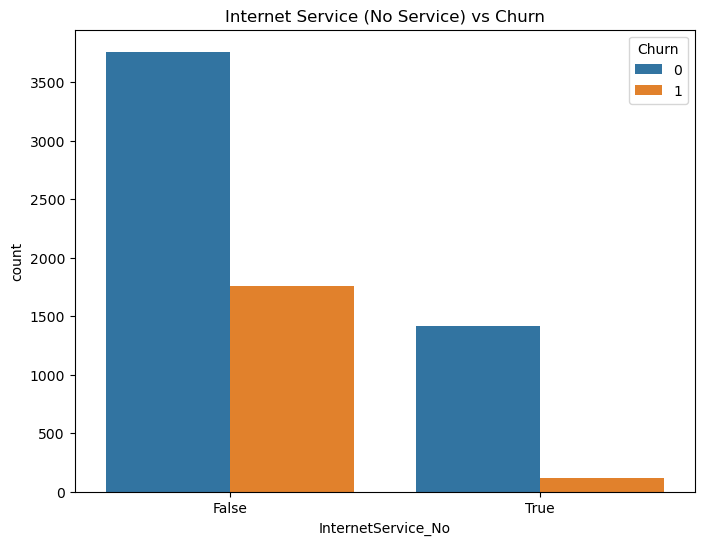

In [196]:
#5. Internet Service vs Churn (Dịch vụ Internet so với churn)
# Sử dụng các cột đã mã hóa 'InternetService_Fiber optic' và 'InternetService_No'
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=churn)
plt.title('Internet Service (Fiber Optic) vs Churn')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='InternetService_No', hue='Churn', data=churn)
plt.title('Internet Service (No Service) vs Churn')
plt.show()

In [197]:
churn.to_csv("churn_processed.csv", index=False)
print("File saved: churn_processed.csv")


File saved: churn_processed.csv


In [198]:
# Label Encoding cho cột 'gender' (1 = Female, 0 = Male)
churn['gender'] = churn['gender'].map({'Female': 1, 'Male': 0})

# Kiểm tra lại kết quả
print(churn[['gender']].head())

   gender
0       1
1       0
2       0
3       0
4       1


In [206]:
from sklearn.model_selection import train_test_split

# Tách các tính năng và biến mục tiêu
X = churn.drop(columns=['Churn', 'customerID'])  # Loại bỏ cột target và ID
y = churn['Churn']  # Cột target

# Chia dữ liệu thành 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [207]:
print(churn.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'charges_per_tenure',
       'is_high_charges', 'is_contract_monthly', 'Partner_Yes',
       'Dependents_Yes'],
      dtype='object')


In [209]:
# One-Hot Encoding cho các cột 'Contract' và 'InternetService' nếu đã mã hóa
churn = pd.get_dummies(churn, columns=['Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'InternetService_No'], drop_first=True)

# Kiểm tra lại kết quả
print(churn.head())

   customerID  gender  SeniorCitizen  tenure PhoneService     MultipleLines  \
0  7590-VHVEG     NaN              0       1           No  No phone service   
1  5575-GNVDE     NaN              0      34          Yes                No   
2  3668-QPYBK     NaN              0       2          Yes                No   
3  7795-CFOCW     NaN              0      45           No  No phone service   
4  9237-HQITU     NaN              0       2          Yes                No   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport  ...  \
0             No          Yes               No          No  ...   
1            Yes           No              Yes          No  ...   
2            Yes          Yes               No          No  ...   
3            Yes           No              Yes         Yes  ...   
4             No           No               No          No  ...   

  PaymentMethod_Mailed check charges_per_tenure is_high_charges  \
0                      False             29.850        

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# In classification report (precision, recall, f1-score)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


NameError: name 'X_train_scaled' is not defined